WARNING    Cannot use Cython, a test compilation failed: Cython is not available (ImportError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


Coefficient of variation: 0.4750147559869727


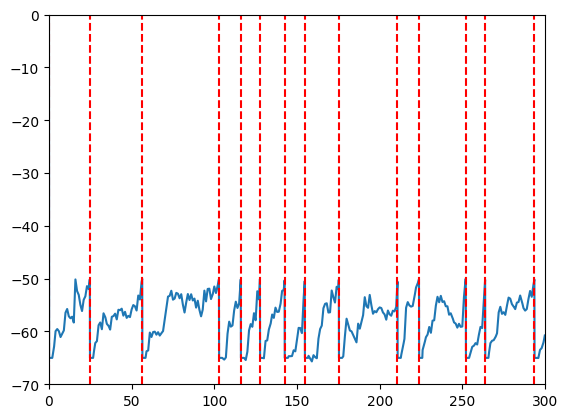

In [3]:
from brian2 import *
import matplotlib.pyplot as plt
import numpy as np

from LIF import lif_neuron

run_time = 200*ms

def my_GWN(range_t, dt, mu, sig, myseed=False):
  I_gwn = mu + sig * abs(np.random.randn(range_t.size))
  return I_gwn

start_scope()

tmp = np.arange(0, run_time/ms, 0.1) * namp
tmp = my_GWN(tmp, 0.1, 0, 2.5) * namp
tmp = tmp.reshape(-1, 1)
curr = TimedArray(tmp, dt=1. * ms)

M, S = lif_neuron(curr, 300*ms)

plt.plot(M.t/ms, M.v[0]/mV)
plt.ylim(-70, 0)
plt.xlim(0, 300)
for s in S.t:
    plt.axvline(s/ms, color="red", ls="--")

times = [t/s for t in S.t]
intervals = [t - s for s, t in zip(times, times[1:])]
CV = np.std(intervals) / np.mean(intervals)
print("Coefficient of variation:", CV)
# pretty high because uhh random 

If we input a constant voltage, the neuron spikes regularly, in contrast to the random spiking we observe when inputting Gaussian white noise. We use the coefficient of variation $CV$ to measure this.  
$CV_{ISI} = \frac{std(ISI)}{mean(ISI)}$

Coefficient of variation: 1.7618686720938086e-15


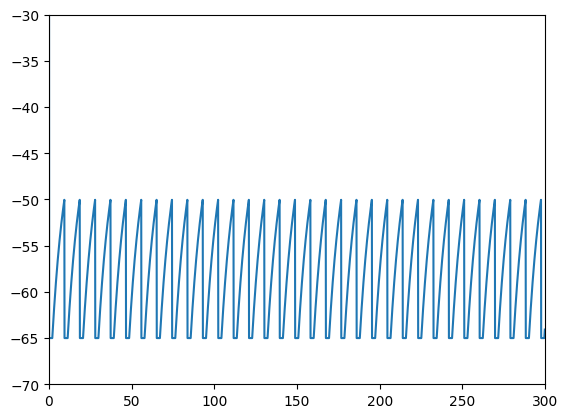

In [10]:
start_scope()

tmp = np.zeros((300, 1)) * amp
tmp[0:] = 3*namp
curr = TimedArray(tmp, dt=1. * ms)

M, S = lif_neuron(curr, 300*ms)

times = [t/s for t in S.t]
intervals = [t - s for s, t in zip(times, times[1:])]
CV = np.std(intervals) / np.mean(intervals)

plt.plot(M.t/ms, M.v[0]/mV)
plt.xlim(0, 300)
plt.ylim(-70, -30)
print("Coefficient of variation:", CV)